In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("data/SPECTF.csv") 
df.shape

(267, 45)

In [7]:
df[:2]

,label,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44
0,1,59,52,70,67,73,66,72,61,58,...,66,56,62,56,72,62,74,74,64,67
1,1,72,62,69,67,78,82,74,65,69,...,65,71,63,60,69,73,67,71,56,58


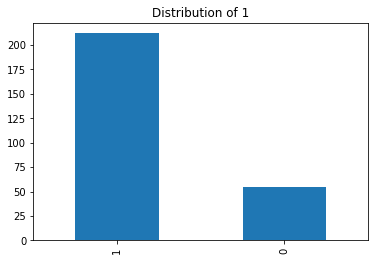

In [8]:
df[df.columns[0]].value_counts().plot(kind='bar')
plt.title("Distribution of 1")    

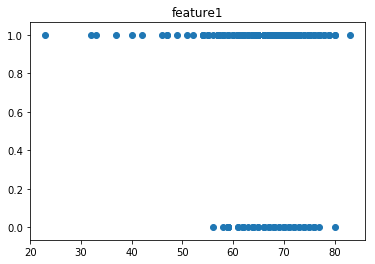

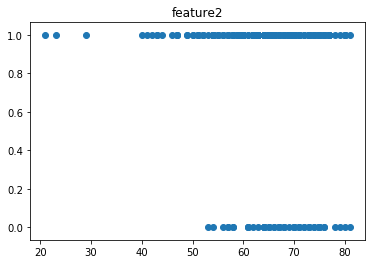

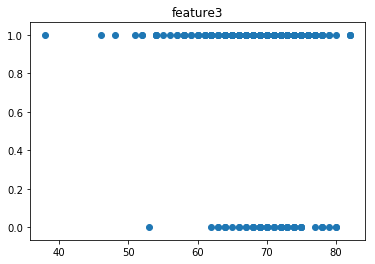

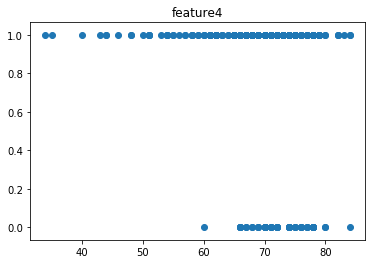

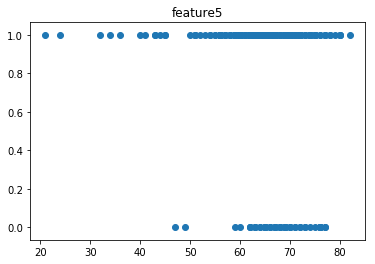

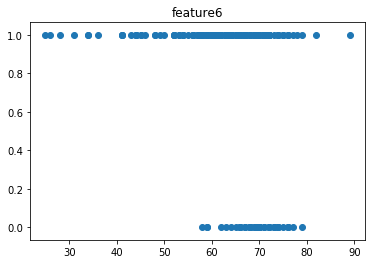

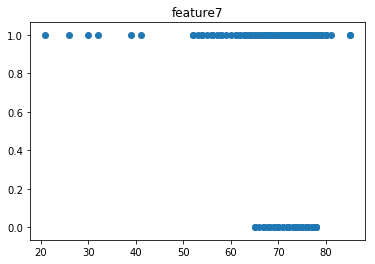

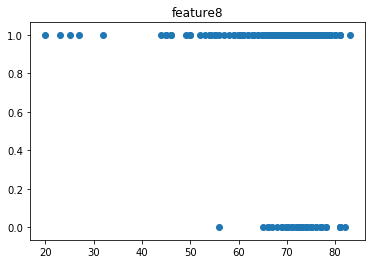

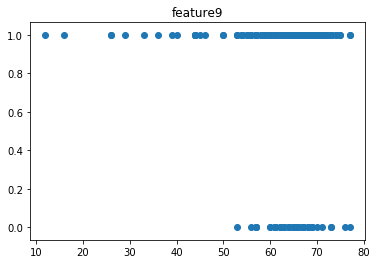

In [11]:
for i, feature in enumerate(df.columns[1:10]):
    plt.title(feature)
    plt.scatter(df.get(feature),df.get(df.columns[0]))
    plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression as LogisticRegression_sklearn
from logistic_regression import LogisticRegression
from random_forest import RandomForest
from sklearn.ensemble import RandomForestClassifier as RandomForest_sklearn

In [13]:
y = df[df.columns[0]].values.astype('float32')
X = df[df.columns[1:]].values.astype('float32')

In [14]:
X.shape, y.shape

((267, 44), (267,))

In [15]:
def split_data(X, y, fraction=0.6):
    split_point = int(X.shape[0] * fraction)
    perm = np.random.permutation(X.shape[0])
    X = X[perm]
    y = y[perm]
    return X[:split_point], y[:split_point], X[split_point:], y[split_point]

In [16]:
def accuracy(y1,y2):
    return len(y1[y1 == y2])*1./len(y1)

In [17]:
def mean_accuracy(X,y):
    table = []
    accuracies = {}
    
    row = {}
    row['model'] = 'my logistic regression'
    row['trials'] = 100
    row['accuracies'] = []
    for trial in range(row['trials']):
        classifier = LogisticRegression() 
        X_train, y_train, X_test, y_test = split_data(X, y, 0.5)
        classifier.fit(X_train, y_train)        
        row['accuracies'].append(accuracy(classifier.predict(X_test),y_test))
    row['test data size'] = X_test.shape[0]
    row['train data size'] = X_train.shape[0]
    row['mean accuracy'] = np.mean(row['accuracies'])    
    row['accuracy variance'] = np.var(row['accuracies'])
    table.append(row)
    
    
    row = {}
    row['model'] = 'sklearn logistic regression'
    row['trials'] = 100
    row['accuracies'] = []
    for trial in range(row['trials']):
        classifier = LogisticRegression_sklearn() 
        X_train, y_train, X_test, y_test = split_data(X, y, 0.5)
        classifier.fit(X_train, y_train)        
        row['accuracies'].append(accuracy(classifier.predict(X_test),y_test))
    row['test data size'] = X_test.shape[0]
    row['train data size'] = X_train.shape[0]
    row['mean accuracy'] = np.mean(row['accuracies'])    
    row['accuracy variance'] = np.var(row['accuracies'])
    table.append(row)
    
    row = {}
    row['model'] = 'my random forest'
    row['trials'] = 5
    row['accuracies'] = []
    for trial in range(row['trials']):
        classifier = RandomForest(10,50,0.4) 
        X_train, y_train, X_test, y_test = split_data(X, y, 0.5)
        classifier.fit(X_train, y_train)        
        row['accuracies'].append(accuracy(classifier.predict(X_test)[0],y_test))
    row['test data size'] = X_test.shape[0]
    row['train data size'] = X_train.shape[0]
    row['mean accuracy'] = np.mean(row['accuracies'])    
    row['accuracy variance'] = np.var(row['accuracies'])
    table.append(row)
    

    
    row = {}
    row['model'] = 'sklearn random forest'
    row['trials'] = 100
    row['accuracies'] = []
    for trial in range(row['trials']):
        classifier = RandomForest_sklearn()
        X_train, y_train, X_test, y_test = split_data(X, y, 0.5)
        classifier.fit(X_train, y_train)        
        row['accuracies'].append(accuracy(classifier.predict(X_test),y_test))
    row['test data size'] = X_test.shape[0]
    row['train data size'] = X_train.shape[0]
    row['mean accuracy'] = np.mean(row['accuracies'])    
    row['accuracy variance'] = np.var(row['accuracies'])
    table.append(row)
    
    
    return table


In [21]:
table = mean_accuracy(X,y)

In [22]:
my_df = pd.DataFrame(table)
my_df.pop('accuracies')
my_df


,accuracy variance,mean accuracy,model,test data size,train data size,trials
0,0.045292,0.684925,my logistic regression,134,133,100
1,0.037887,0.642761,sklearn logistic regression,134,133,100
2,0.082232,0.725373,my random forest,134,133,5
3,0.104397,0.666866,sklearn random forest,134,133,100
